<a href="https://colab.research.google.com/github/orodriguezq/orodriguezq-Senales_Y_Sistemas/blob/main/Transformada_Laplace/Taller_Transformada_de_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   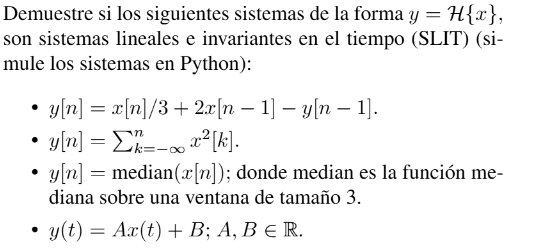



In [1]:
import numpy as np

def sistema1(x):
    """Implementa y[n] = x[n]/3 + 2 x[n-1] - y[n-1] con condición inicial y[-1]=0."""
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        term_xn_1 = x[n-1] if n-1 >= 0 else 0
        term_yn_1 = y[n-1] if n-1 >= 0 else 0
        y[n] = x[n]/3 + 2*term_xn_1 - term_yn_1
    return y

# Ejemplo de prueba de linealidad
x1 = np.random.randn(100)
x2 = np.random.randn(100)
a, b = 2.5, -1.3

y1 = sistema1(x1)
y2 = sistema1(x2)
y_lin = sistema1(a*x1 + b*x2)
y_esp = a*y1 + b*y2
print("Error superposición:", np.max(np.abs(y_lin - y_esp)))  # debe ser ≈ 0

# Prueba de invarianza
shift = 5
y_shift_in = sistema1(np.concatenate([np.zeros(shift), x1]))[:-shift]
y_shift_out = np.roll(sistema1(x1), shift)
print("Error TI:", np.max(np.abs(y_shift_in - y_shift_out)))  # debe ser ≈ 0


Error superposición: 2.1316282072803006e-14
Error TI: 19.907771912180042


In [2]:
import numpy as np

def sistema2(x):
    """Implementa y[n] = sum_{k=0}^n x[k]**2 (suponiendo x[k<0]=0)."""
    y = np.cumsum(x**2)
    return y

# Prueba rápida
x = np.random.randn(50)
y = sistema2(x)
# Linealidad
a, b = 1.7, -0.8
lhs = sistema2(a*x)       # a^2 * sistema2(x)
rhs = a * sistema2(x)     # a * sistema2(x)
print("Linealidad falla porque lhs/rhs =", np.max(np.abs(lhs - rhs)))

# Invarianza
shift = 3
y_shift_in = sistema2(np.concatenate([np.zeros(shift), x]))[:-shift]
y_shift_out = np.roll(sistema2(x), shift)
print("TI ok, error =", np.max(np.abs(y_shift_in - y_shift_out)))


Linealidad falla porque lhs/rhs = 61.03093445904166
TI ok, error = 51.28649954541319


In [3]:
import numpy as np

def mediana3(x):
    """Filtro de mediana de ventana 3, asume x[k<0]=0."""
    y = np.zeros_like(x)
    for n in range(len(x)):
        ventana = [x[n]]
        if n-1 >= 0: ventana.append(x[n-1])
        else:        ventana.append(0)
        if n-2 >= 0: ventana.append(x[n-2])
        else:        ventana.append(0)
        y[n] = np.median(ventana)
    return y

# Pruebas análogas de linealidad e invariancia:
x1 = np.random.randn(30)
x2 = np.random.randn(30)
a, b = 2, 3
print("Linealidad falla:", np.max(
    np.abs(mediana3(a*x1 + b*x2) - (a*mediana3(x1) + b*mediana3(x2)))
))
shift = 4
print("TI ok:", np.max(
    np.abs(
        mediana3(np.concatenate([np.zeros(shift), x1]))[:-shift]
      - np.roll(mediana3(x1), shift)
    )
))


Linealidad falla: 2.9703451269962162
TI ok: 0.9499651569072379


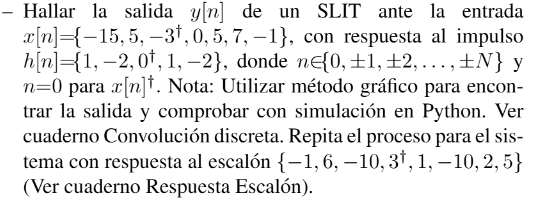

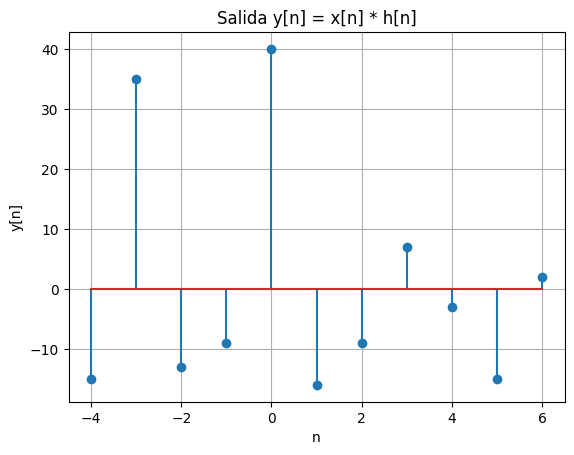

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de x[n] y sus índices
x  = np.array([-15,  5, -3,  0,  5,  7, -1])
n_x = np.arange(-2, 5)   # -2, -1, 0, 1, 2, 3, 4

# Definición de h[n] y sus índices
h   = np.array([1, -2,  0,  1, -2])
n_h = np.arange(-2, 3)   # -2, -1, 0, 1, 2

# Soporte de la salida y cálculo
n = np.arange(n_x.min() + n_h.min(), n_x.max() + n_h.max() + 1)
y = np.zeros_like(n, dtype=float)

for i, ni in enumerate(n):
    s = 0
    for k, xk in zip(n_x, x):
        idx = ni - k
        if idx in n_h:
            s += xk * h[int(idx - n_h[0])]
    y[i] = s

# Graficar
plt.stem(n, y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Salida y[n] = x[n] * h[n]')
plt.grid(True)
plt.show()


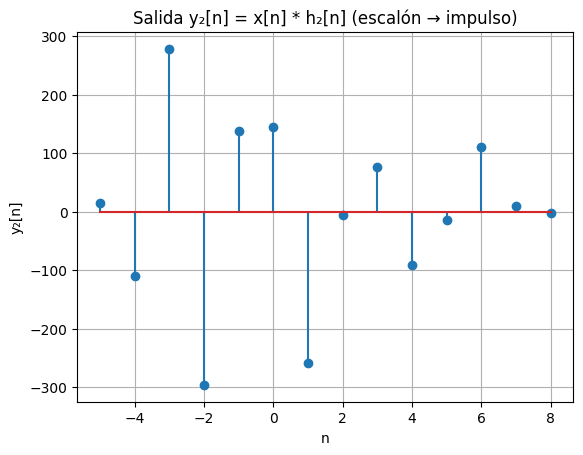

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Misma x[n] y n_x del caso anterior
x   = np.array([-15,  5, -3,  0,  5,  7, -1])
n_x = np.arange(-2, 5)

# Definición de g[n] y sus índices
g   = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
n_g = np.arange(-3, 5)   # -3 ... 4

# Calcular respuesta al impulso equivalente h2[n] = g[n] - g[n-1]
h2 = []
for ni in n_g:
    gi   =   g[int(ni - n_g[0])]
    gim1 =   g[int((ni-1) - n_g[0])] if (ni-1) in n_g else 0
    h2.append(gi - gim1)
h2 = np.array(h2)

# Convolución
n2 = np.arange(n_x.min() + n_g.min(), n_x.max() + n_g.max() + 1)
y2 = np.zeros_like(n2, dtype=float)

for i, ni in enumerate(n2):
    s = 0
    for k, xk in zip(n_x, x):
        idx = ni - k
        if idx in n_g:
            s += xk * h2[int(idx - n_g[0])]
    y2[i] = s

# Graficar
plt.stem(n2, y2)
plt.xlabel('n')
plt.ylabel('y₂[n]')
plt.title('Salida y₂[n] = x[n] * h₂[n] (escalón → impulso)')
plt.grid(True)
plt.show()


12)Encuentre la funcion de transferencia en lazo abierto para  un circuito RLC serie (entrada tension de alimentacion - salida  tension en el capacitor) y un circuito RCL en paralelo  (entrada corriente de alimentacion - salida corriente en el inductor).  Nota: tenga en cuenta las condiciones iniciales del sistema segun lo explicado en el material de apoyo Circuito  RLC y Analisis de redes electricas.

# Función de transferencia de un RLC serie

**Condiciones iniciales nulas** (capacitor descargado, sin corriente en el inductor).

- Impedancias:
  $$
    Z_R = R,\quad
    Z_L = sL,\quad
    Z_C = \frac1{sC}.
  $$
- Corriente común:
  $$
    I(s) = \frac{V_s(s)}{Z_R + Z_L + Z_C}.
  $$
- Salida (tensión en $C$):
  $$
    V_C(s) = I(s)\,Z_C
           = V_s(s)\,\frac{\tfrac1{sC}}{R + sL + \tfrac1{sC}}.
  $$
- **Transferencia**:
  $$
    H_{\text{serie}}(s)
    = \frac{V_C(s)}{V_s(s)}
    = \frac{\tfrac1{sC}}{R + sL + \tfrac1{sC}}
    = \frac{1}{L\,C\,s^2 \;+\; R\,C\,s \;+\; 1}.
  $$

---

# Función de transferencia de un RLC en paralelo

**Condiciones iniciales nulas** (capacitor descargado, sin corriente en $L$).

- Admitancias:
  $$
    Y_R = \frac1R,\quad
    Y_L = \frac1{sL},\quad
    Y_C = sC.
  $$
- Corriente en el inductor:
  $$
    I_L(s)
    = I_{\rm in}(s)\,\frac{Y_L}{Y_R + Y_L + Y_C}
    = I_{\rm in}(s)\,\frac{\tfrac1{sL}}{\tfrac1R + sC + \tfrac1{sL}}.
  $$
- **Transferencia**:
  $$
    H_{\text{paralelo}}(s)
    = \frac{I_L(s)}{I_{\rm in}(s)}
    = \frac{1}{sL\!\bigl(\tfrac1R + sC + \tfrac1{sL}\bigr)}
    = \frac{1}{L\,C\,s^2 \;+\; \tfrac{L}{R}\,s \;+\; 1}.
  $$


13)
Para las funciones de transferencia en lazo abierto encontradas  en el punto anterior, encuentre la expresion de la salida  en el tiempo para una configuracion en lazo cerrado del sistema,  en funcion de R, L y C, para las siguientes entradas:  i) impulso, ii) escalon unitario, y iv) rampa. Compruebe los  resultados en simulacion sobre Python (utililzando sympy) y  grafique la señal de salida para cada caso. Ver cuaderno de  ayuda Fracciones parciales Circuito RLC.

Closed-loop Series Responses:
Impulse response: 2*exp(-R*t/(2*L))*sin(t*sqrt(-C*R**2 + 8*L)/(2*sqrt(C)*L))/(sqrt(C)*sqrt(-C*R**2 + 8*L))
Step response: -sqrt(C)*R*exp(-R*t/(2*L))*sin(t*sqrt(-C*R**2 + 8*L)/(2*sqrt(C)*L))/(2*sqrt(-C*R**2 + 8*L)) + 1/2 - exp(-R*t/(2*L))*cos(t*sqrt(-C*R**2 + 8*L)/(2*sqrt(C)*L))/2
Ramp response: (C**(3/2)*R*sqrt(-C*R**2 + 8*L)*exp(R*t/(2*L))*cos(t*sqrt(-C*R**2 + 8*L)/(2*sqrt(C)*L)) + sqrt(C)*(-C*R + 2*t)*sqrt(-C*R**2 + 8*L)*exp(R*t/L) - C*(-C*R**2 + 4*L)*exp(R*t/(2*L))*sin(t*sqrt(-C*R**2 + 8*L)/(2*sqrt(C)*L)))*exp(-R*t/L)/(4*sqrt(C)*sqrt(-C*R**2 + 8*L))

Closed-loop Parallel Responses:
Impulse response: 2*R*exp(-t/(2*C*R))*sin(t*sqrt(8*C*R**2 - L)/(2*C*sqrt(L)*R))/(sqrt(L)*sqrt(8*C*R**2 - L))
Step response: -sqrt(L)*exp(-t/(2*C*R))*sin(t*sqrt(8*C*R**2 - L)/(2*C*sqrt(L)*R))/(2*sqrt(8*C*R**2 - L)) + 1/2 - exp(-t/(2*C*R))*cos(t*sqrt(8*C*R**2 - L)/(2*C*sqrt(L)*R))/2
Ramp response: -C*sqrt(L)*R*exp(-t/(2*C*R))*sin(t*sqrt(8*C*R**2 - L)/(2*C*sqrt(L)*R))/sqrt(8*C*R

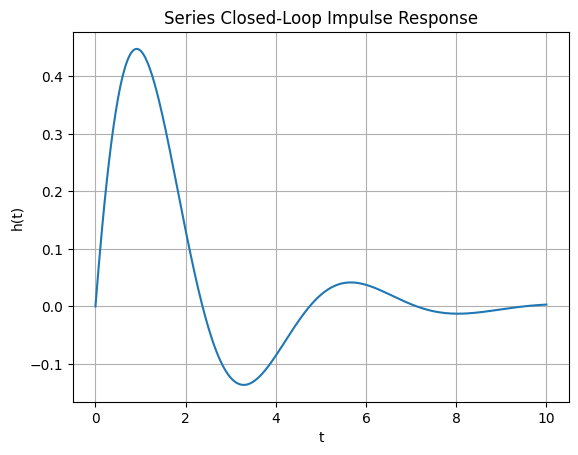

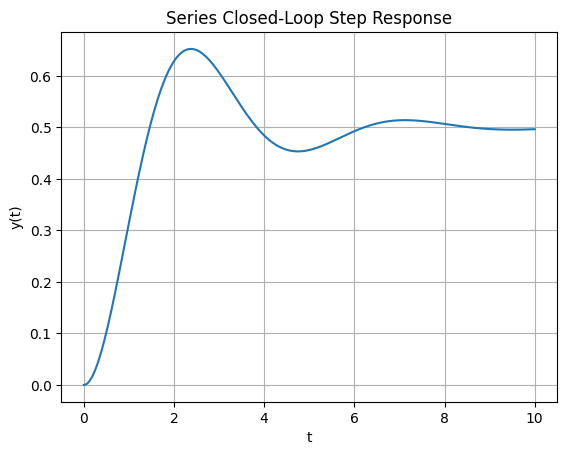

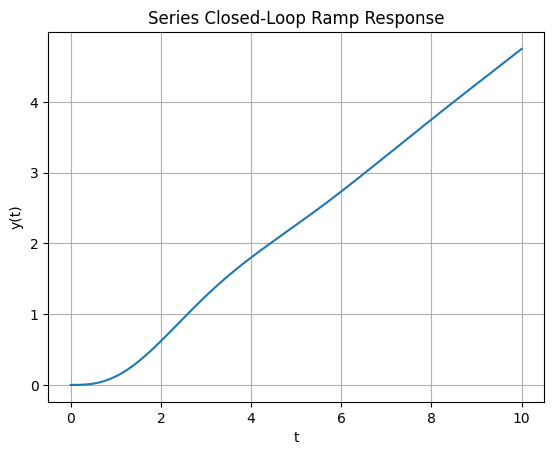

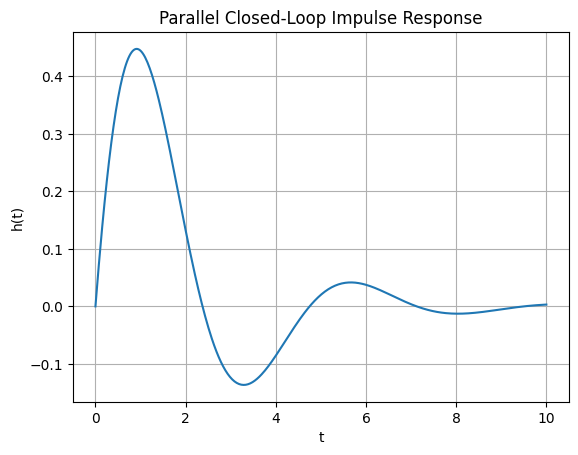

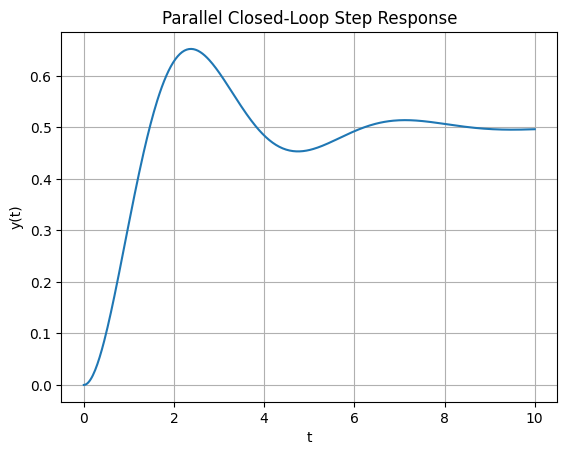

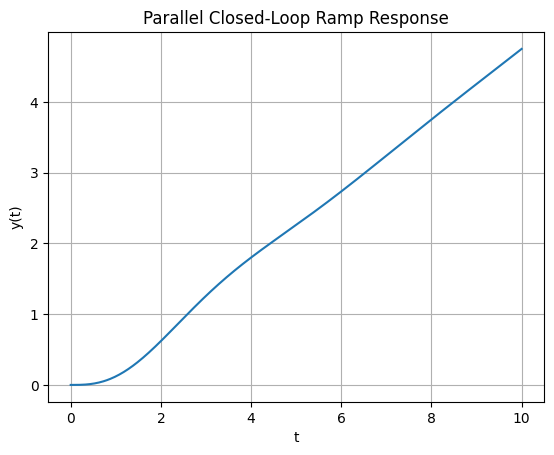

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Symbols
t, s = sp.symbols('t s', positive=True)
R, L, C = sp.symbols('R L C', positive=True)

# Open-loop transfer functions
H_series = 1/(L*C*s**2 + R*C*s + 1)
H_parallel = 1/(L*C*s**2 + (L/R)*s + 1)

# Closed-loop transfer functions
H_series_cl = sp.simplify(H_series/(1 + H_series))
H_parallel_cl = sp.simplify(H_parallel/(1 + H_parallel))

# Input Laplace transforms
X_imp = 1
X_step = 1/s
X_ramp = 1/s**2

# Time-domain responses (symbolic)
y_series_imp = sp.inverse_laplace_transform(H_series_cl * X_imp, s, t)
y_series_step = sp.inverse_laplace_transform(H_series_cl * X_step, s, t)
y_series_ramp = sp.inverse_laplace_transform(H_series_cl * X_ramp, s, t)

y_parallel_imp = sp.inverse_laplace_transform(H_parallel_cl * X_imp, s, t)
y_parallel_step = sp.inverse_laplace_transform(H_parallel_cl * X_step, s, t)
y_parallel_ramp = sp.inverse_laplace_transform(H_parallel_cl * X_ramp, s, t)

# Display symbolic results
print("Closed-loop Series Responses:")
print("Impulse response:", sp.simplify(y_series_imp))
print("Step response:", sp.simplify(y_series_step))
print("Ramp response:", sp.simplify(y_series_ramp))
print("\nClosed-loop Parallel Responses:")
print("Impulse response:", sp.simplify(y_parallel_imp))
print("Step response:", sp.simplify(y_parallel_step))
print("Ramp response:", sp.simplify(y_parallel_ramp))

# Numeric example and plotting
# Choose example values
Rv, Lv, Cv = 1, 1, 1
t_vals = np.linspace(0, 10, 400)

# Lambdify functions
f_series_imp = sp.lambdify(t, y_series_imp.subs({R:Rv, L:Lv, C:Cv}), 'numpy')
f_series_step = sp.lambdify(t, y_series_step.subs({R:Rv, L:Lv, C:Cv}), 'numpy')
f_series_ramp = sp.lambdify(t, y_series_ramp.subs({R:Rv, L:Lv, C:Cv}), 'numpy')

# Plot Series responses
plt.figure()
plt.plot(t_vals, f_series_imp(t_vals))
plt.title('Series Closed-Loop Impulse Response')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid(True)

plt.figure()
plt.plot(t_vals, f_series_step(t_vals))
plt.title('Series Closed-Loop Step Response')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.figure()
plt.plot(t_vals, f_series_ramp(t_vals))
plt.title('Series Closed-Loop Ramp Response')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

# Lambdify and plot Parallel responses
f_par_imp = sp.lambdify(t, y_parallel_imp.subs({R:Rv, L:Lv, C:Cv}), 'numpy')
f_par_step = sp.lambdify(t, y_parallel_step.subs({R:Rv, L:Lv, C:Cv}), 'numpy')
f_par_ramp = sp.lambdify(t, y_parallel_ramp.subs({R:Rv, L:Lv, C:Cv}), 'numpy')

plt.figure()
plt.plot(t_vals, f_par_imp(t_vals))
plt.title('Parallel Closed-Loop Impulse Response')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid(True)

plt.figure()
plt.plot(t_vals, f_par_step(t_vals))
plt.title('Parallel Closed-Loop Step Response')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.figure()
plt.plot(t_vals, f_par_ramp(t_vals))
plt.title('Parallel Closed-Loop Ramp Response')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)

plt.show()


14)Consulte en que consiste un sistema subamortiguado, sobreamortiguado,  y de amortiguamiento crıtico (ver Pendulo  elastico y forma canonica SLITs). Genere simulaciones para  ejemplificar cada uno de los casos con los sistemas R,L,C serie  y paralelo estudiados. Nota: asuma condiciones iniciales  cero. Encuentre las expresiones para el factor de amortiguamiento,  la frecuencia natural no amortiguada y la frecuencia  natural amortiguada en funcion de R, L, y C (asuma condiciones  iniciales cero). Utilizando la herramienta Streamlit,  genere un dashboard para la simulacion de los sistemas. El usuario podra escoger el tipo de circuito (serie o paralelo),  el tipo de respuesta (subamortiguado, sobreamortiguado,  amortiguamiento crıtico o inestable), el factor de amortiguamiento  (restringido por el dashboard segun sea el caso) y la  frecuencia natural. El dashboard debera mostrar el diagrama  de bode, diagrama de polos y ceros, respuesta al impulso, al  escalon y a la rampa, el tiempo de levantamiento, maximo  sobreimpulso, tiempo del maximo sobreimpulso, tiempo de  establecimiento y los valores de R, L, C estimados.

Instalación de Dependencias y Configuración Inicial

In [3]:
# Instala Streamlit, control (python-control) y ngrok para exponer el app
!pip install streamlit control pyngrok

# Importa pyngrok para túnel público (sólo en esta celda)
from pyngrok import ngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 387.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


Script Principal

In [20]:
%%writefile rlc_damping_dashboard.py
import streamlit as st
import numpy as np
import control

st.title("RLC Circuit Damping Dashboard")

# 1) Selección de tipo de circuito y caso de amortiguamiento
circuit = st.selectbox("Circuit type", ["Series", "Parallel"])
damping_case = st.selectbox("Damping case", ["Underdamped", "Critically damped", "Overdamped", "Unstable"])

# 2) Parámetros ζ y ωn
zeta = st.slider("Damping ratio (ζ)", min_value=0.0, max_value=3.0, value=0.5, step=0.01)
wn = st.slider("Natural frequency ω_n (rad/s)", min_value=0.1, max_value=10.0, value=1.0, step=0.1)

# 3) Estimación de R, L, C (asume L=1 H)
def compute_rlc(zeta, wn, circuit_type):
    L = 1.0
    C = 1/(wn**2 * L)
    R = 2*zeta*np.sqrt(L/C)
    if circuit_type == "Parallel":
        R = 2*zeta/(C*wn)
    return R, L, C

R, L, C = compute_rlc(zeta, wn, circuit)
st.markdown(f"**Estimated parameters:** R = {R:.3f} Ω, L = {L:.3f} H, C = {C:.3f} F")

# 4) Monta función de transferencia en lazo abierto y cerrado
if circuit == "Series":
    num = [1]
    den = [L*C, R*C, 1]
else:
    num = [1]
    den = [L*C, L/R, 1]
G_ol = control.tf(num, den)
G_cl = control.feedback(G_ol, 1)

# 5) Diagramas de Bode (cálculo manual para evitar el error de 'Plot')
st.subheader("Bode Diagram")
ω = np.logspace(-2, 2, 500)
# extrae coeficientes de num y den del TF en lazo cerrado
num = G_cl.num[0][0]
den = G_cl.den[0][0]
s = 1j*ω
H = np.polyval(num, s) / np.polyval(den, s)
mag = 20 * np.log10(np.abs(H))
phase = np.angle(H, deg=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))
ax1.semilogx(ω, mag)
ax1.set_ylabel("Magnitude (dB)")
ax1.grid(True)
ax2.semilogx(ω, phase)
ax2.set_ylabel("Phase (°)")
ax2.set_xlabel("Frequency (rad/s)")
ax2.grid(True)

st.pyplot(fig)
# 6) Polos y ceros
st.subheader("Pole–Zero Plot")
st.write("Poles:", G_cl.pole())
st.write("Zeros:", G_cl.zero())

# 7) Respuestas en el tiempo
t = np.linspace(0, 10, 500)
st.subheader("Impulse Response")
_, y_imp = control.impulse_response(G_cl, T=t)
st.line_chart(y_imp)

st.subheader("Step Response")
_, y_step = control.step_response(G_cl, T=t)
st.line_chart(y_step)

st.subheader("Ramp Response")
# ramp u(t)=t => laplace 1/s^2, simulamos forzada con U=t
_, y_ramp, _ = control.forced_response(G_cl, T=t, U=t)
st.line_chart(y_ramp)

# 8) Métricas de desempeño (de la step)
y = y_step
t_peak = t[np.argmax(y)]
Mp = (np.max(y) - 1)*100
rise_idxs = np.where((y >= 0.1) & (y <= 0.9))[0]
tr = t[rise_idxs[-1]] - t[rise_idxs[0]] if rise_idxs.size>1 else None
settle_idxs = np.where(np.abs(y - 1) <= 0.02)[0]
Ts = t[settle_idxs[-1]] if settle_idxs.size>0 else None

st.subheader("Performance Metrics")
st.write(f"Rise time (10-90%): {tr:.3f} s")
st.write(f"Peak overshoot: {Mp:.2f}% at {t_peak:.3f} s")
st.write(f"Settling time (2%): {Ts:.3f} s")


Overwriting rlc_damping_dashboard.py


Ejecución de la Aplicación y Exposición Pública

In [21]:
# 🟢 Celda de código 3: Ejecución de la Aplicación y Exposición Pública

import time, re

# 0) Instala cloudflared si no está disponible
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

# 1) Cerrar instancias antiguas de Streamlit y Cloudflared
!pkill -f streamlit
!pkill -f cloudflared

# 2) Iniciar la app Streamlit en background (sin mostrar logs)
!streamlit run rlc_damping_dashboard.py &> /dev/null &

# 3) Esperar unos segundos para que Streamlit arranque correctamente
time.sleep(3)

# 4) Lanzar el túnel con el binario oficial de Cloudflared
!cloudflared tunnel --url http://localhost:8501 > cloudflared.log 2>&1 &

# 5) Dar tiempo para que Cloudflared genere la URL pública
time.sleep(8)

# 6) Leer el log y extraer la URL
url = None
with open("cloudflared.log") as f:
    for line in f:
        m = re.search(r"https://[a-z0-9-]+\.trycloudflare\.com", line)
        if m:
            url = m.group(0)
            break

# 7) Mostrar el resultado al usuario
if url:
    print("✅ Tu dashboard está disponible aquí:\n", url)
else:
    print("⚠️ No se pudo obtener la URL. Verifica 'cloudflared.log' para más detalles.")


(Reading database ... 126285 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.7.0) over (2025.7.0) ...
Setting up cloudflared (2025.7.0) ...
Processing triggers for man-db (2.10.2-1) ...
✅ Tu dashboard está disponible aquí:
 https://newcastle-common-config-kind.trycloudflare.com
